In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

### Constant Model

In [3]:
results0 = np.loadtxt("time.txt")
results2 = np.loadtxt("infectd.txt")

results6 = np.loadtxt("days.txt")
results7 = np.loadtxt("cases.txt")

results10 = np.loadtxt("beta.txt")
results11 = np.loadtxt("kappa.txt")
results12 = np.loadtxt("Nf.txt")


results13 = np.loadtxt("R_sq.txt")
results14 = np.loadtxt("MAPE.txt")
results15 = np.loadtxt("EV.txt")
results16 = np.loadtxt("RMSE.txt")

mse_train_loss = np.loadtxt("mse_train_loss.txt")
mse_validation_loss = np.loadtxt("mse_validation_loss.txt")
rmse_train_loss = np.loadtxt("rmse_train_loss.txt")
rmse_validation_loss = np.loadtxt("rmse_validation_loss.txt")

In [4]:
# All have this shape

print(results0.shape)
print(results2.shape)

print(results6.shape)
print(results7.shape)

print(results10.shape)
print(results11.shape)
print(results12.shape)

print(results13.shape)
print(results14.shape)
print(results15.shape)
print(results16.shape)

(5, 300)
(5, 300)
(160,)
(160,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)


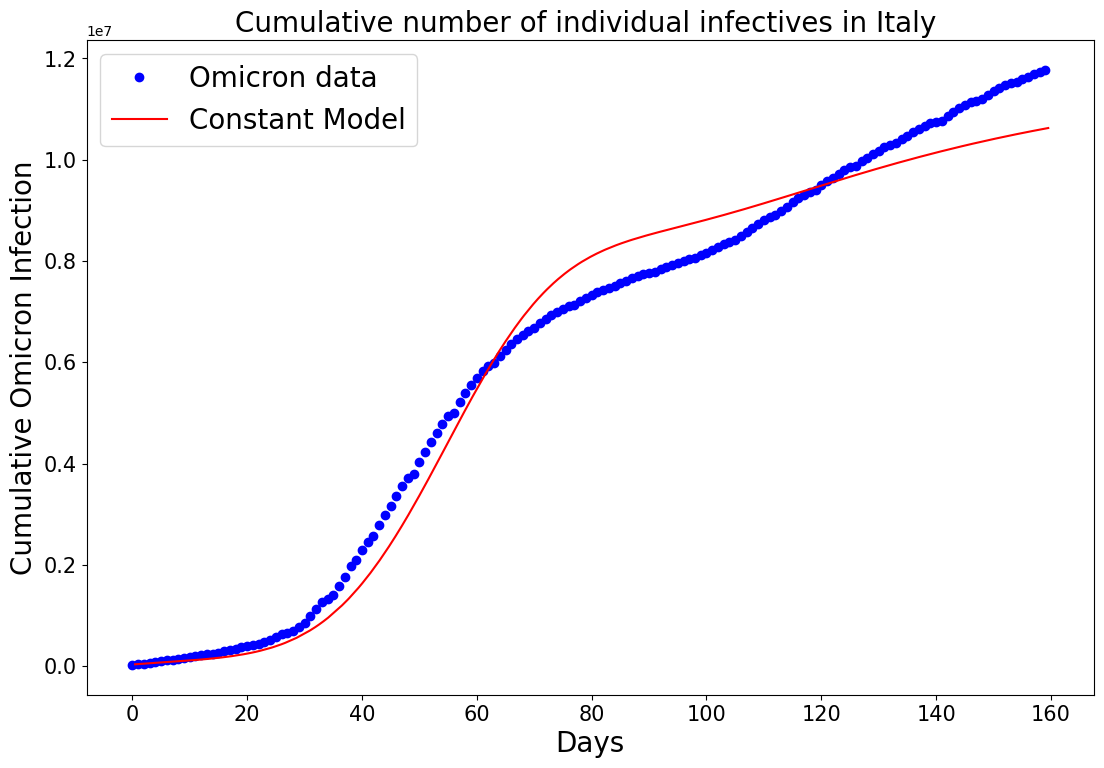

In [5]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Italy ',fontsize = 20)
ax1.plot(results6,results7,'bo')
ax1.plot(results0[0,:],np.mean(results2,0),'r')
ax1.fill_between(results0[0,:],                 
 np.mean(results2,0)-(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 np.mean(results2,0)+(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 alpha=0.5)
#ax1.plot(first, second,color ='r')
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Constant Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [6]:
# mean and std of the parameters

mean_beta = np.mean(results10)
mean_kappa = np.mean(results11)
mean_Nf = np.mean(results12)

mean_R_sq = np.mean(results13)
mean_MAPE = np.mean(results14)
mean_EV = np.mean(results15)
mean_RMSE = np.mean(results16)


std_beta = np.std(results10)
std_kappa = np.std(results11)
std_Nf = np.std(results12)


std_R_sq = np.std(results13)
std_MAPE = np.std(results14)
std_EV = np.std(results15)
std_RMSE = np.std(results16)

In [7]:
print(mean_beta)
print(std_beta)

953.518371582
0.03523421684397494


In [8]:
print(mean_kappa)
print(std_kappa)

0.11818415200000001
4.334975893818672e-06


In [9]:
print(np.min(results7) + (np.max(results7) - np.min(results7))*mean_Nf)
print(np.min(results7) + (np.max(results7) - np.min(results7))*std_Nf)

9502523.784475325
21027.57714362176


In [10]:
print(mean_R_sq)
print(mean_MAPE)
print(mean_EV)
print(mean_RMSE)

0.9144408307937366
0.44743162123404645
0.8952562484936974
2605441.253176711


In [11]:
logistic_function = lambda t, Nf, beta, kappa: \
    Nf / (1 + beta * np.exp(-kappa *t)) 

In [12]:
def plateau_rate(results7, mean_Nf, mean_beta, mean_kappa, function):
    # Calculate rates of infection based on model
    rates = []

    # Calculate rates for the entire given dataset
    for day in range(1, len(results7)):
        infection_today = function(
            day,
            mean_Nf,
            mean_beta,
            mean_kappa,
        )
        infection_yesterday = function(
            day - 1,
            mean_Nf,
            mean_beta,
            mean_kappa,
        )
        rate = infection_today - infection_yesterday
        rates.append(rate)
    
    # Find the maximum rate of infection
    max_rate = max(rates)
    
    # First, find the day of the maximum rate (the peak)
    peak_day = rates.index(max_rate)

    # Then identify the day when the rate of infection is 5% of the maximum rate after the peak
    plateau_day = -1  # Initializing to a default value
    for i in range(peak_day, len(rates)):
        if rates[i] <= 0.05 * max_rate:
            plateau_day = i + 1  # adding 1 since we started calculating rates from day 1
            break
    
    # If the plateau_day remains -1, it means the condition wasn't met
    if plateau_day == -1:
        return None, None
    
    return plateau_day, function(
            plateau_day,
            mean_Nf,
            mean_beta,
            mean_kappa,
        )

dayys, confirmed_now = plateau_rate(results7, mean_Nf, mean_beta, mean_kappa, logistic_function)

if dayys is not None:
    print(f"On day {dayys}, the number of infected people will plateau at {int(np.min(results7) + (np.max(results7) - np.min(results7))*confirmed_now)}")
else:
    print("The model does not predict a plateau within the given data.")


On day 96, the number of infected people will plateau at 9396847


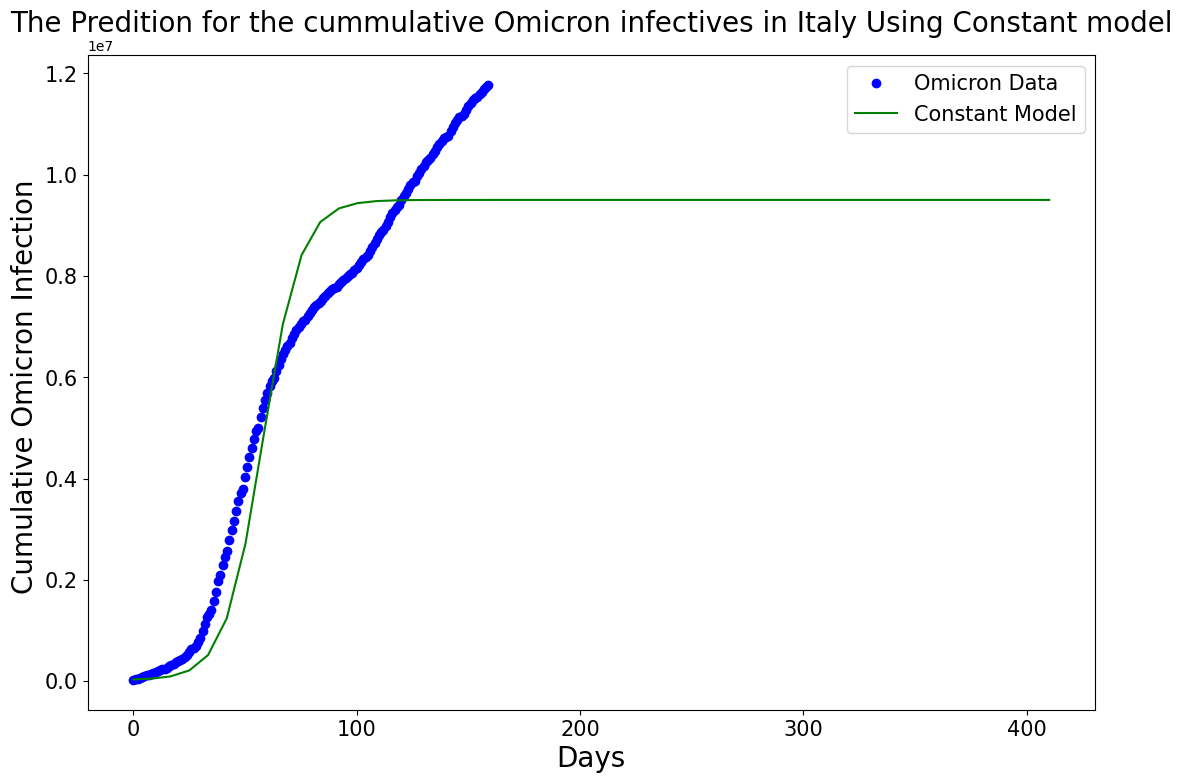

In [13]:
xL = np.linspace(0, len(results7) + 250)
yL = np.min(results7) + (np.max(results7) - np.min(results7))*logistic_function(xL,  mean_Nf, mean_beta, mean_kappa)

from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))

ax1.set_title('The Predition for the cummulative Omicron infectives in Italy Using Constant model',fontsize = 20)
ax1.plot(results6,results7,'bo')
ax1.plot(xL, yL,'g')
ax1.legend(('Omicron Data','Constant Model', 'Constant model prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection ', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

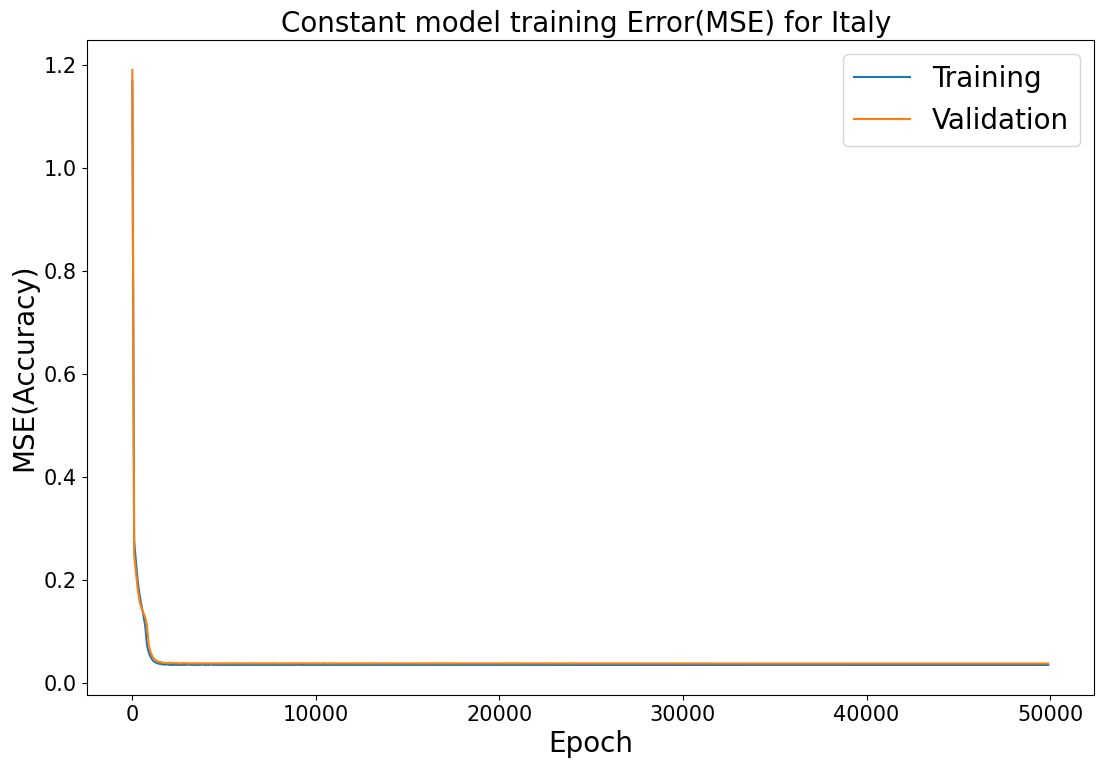

In [14]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Constant model training Error(MSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(mse_train_loss,0))
ax1.plot(np.arange(0,50000,100),np.mean(mse_validation_loss,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

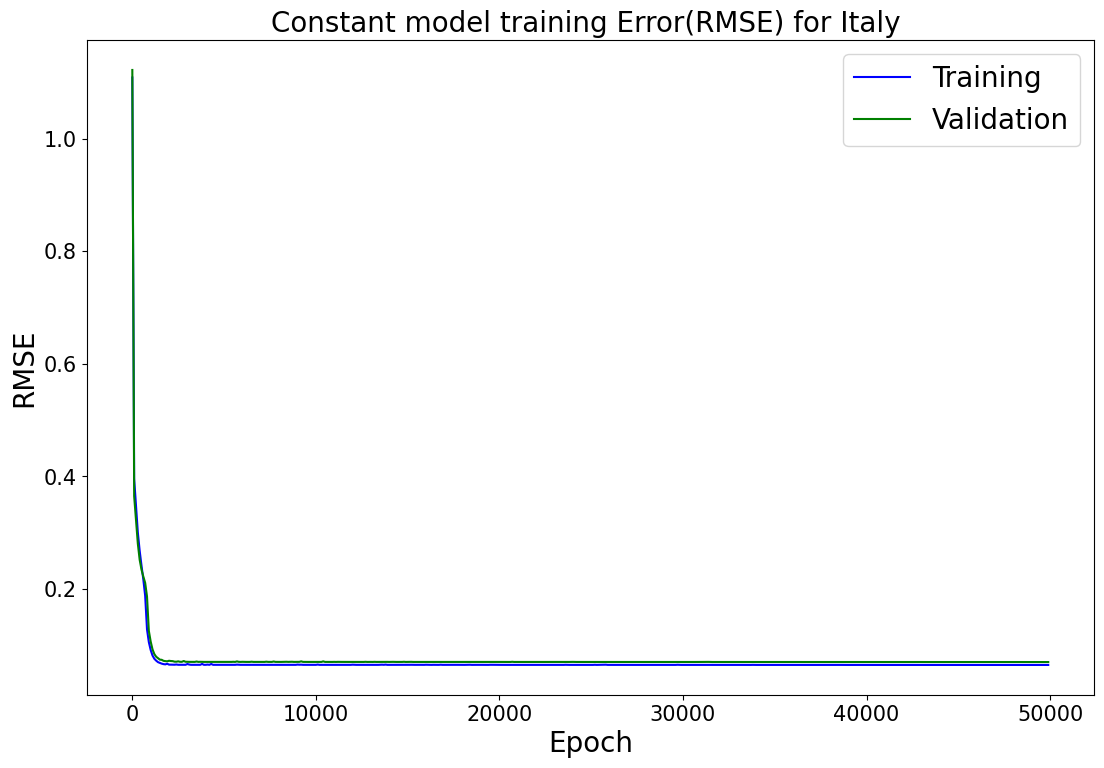

In [15]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Constant model training Error(RMSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(rmse_train_loss,0), "b")
ax1.plot(np.arange(0,50000,100),np.mean(rmse_validation_loss,0), "g")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### Rational Model

In [16]:
T1R = np.loadtxt("timeR.txt")
I1R = np.loadtxt("infectdR.txt")
 
T0R = np.loadtxt("daysR.txt")
I0R = np.loadtxt("casesR.txt")
alphaR = np.loadtxt("alphaR.txt")

beta_valueR = np.loadtxt("betaR.txt")
kappa_valueR = np.loadtxt("kappaR.txt")
Nf_valueR = np.loadtxt("NfR.txt")
d_valueR = np.loadtxt("dR.txt")



R_sqR = np.loadtxt("R_sqR.txt")
MAPE_R = np.loadtxt("MAPE_R.txt")
EV_R = np.loadtxt("EV_R.txt")
RMSE_R = np.loadtxt("RMSE_R.txt")

mse_train_lossR = np.loadtxt("mse_train_lossR.txt")
mse_validation_lossR = np.loadtxt("mse_validation_lossR.txt")
rmse_train_lossR = np.loadtxt("rmse_train_lossR.txt")
rmse_validation_lossR = np.loadtxt("rmse_validation_lossR.txt")

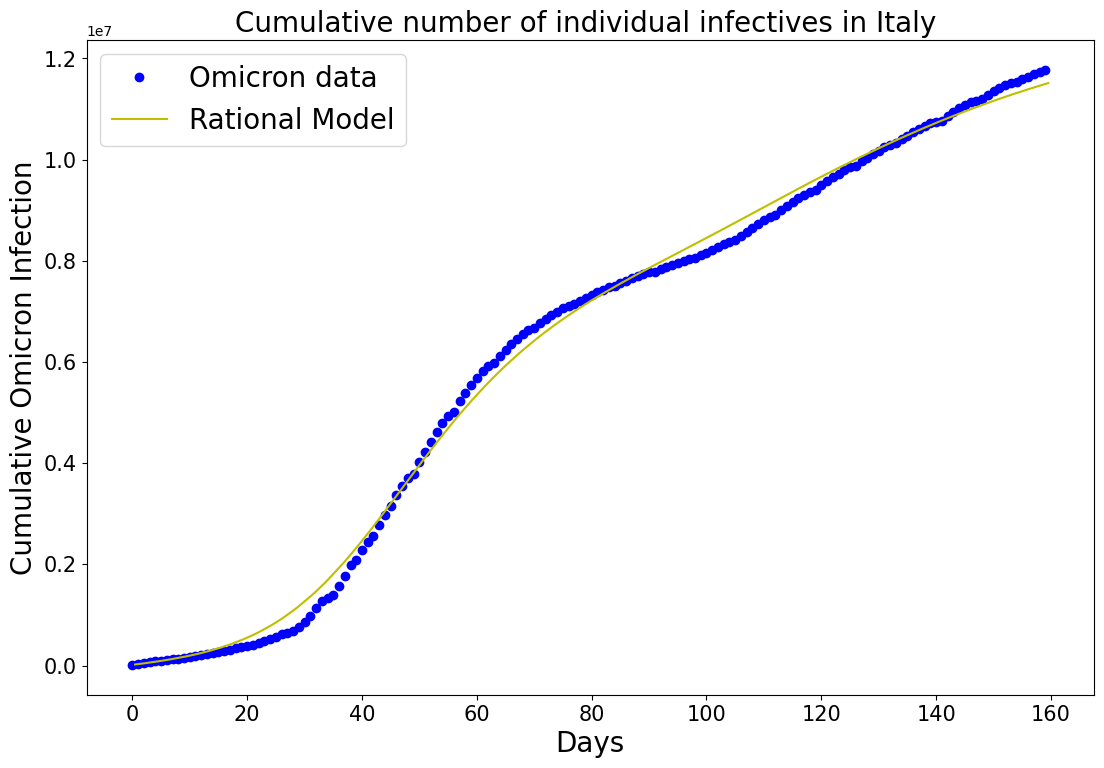

In [17]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0R,I0R,'bo')
ax1.plot(T1R[0,:],np.mean(I1R,0),'y')
ax1.fill_between(T1R[0,:],                 
 np.mean(I1R,0)-(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 np.mean(I1R,0)+(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Rational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)


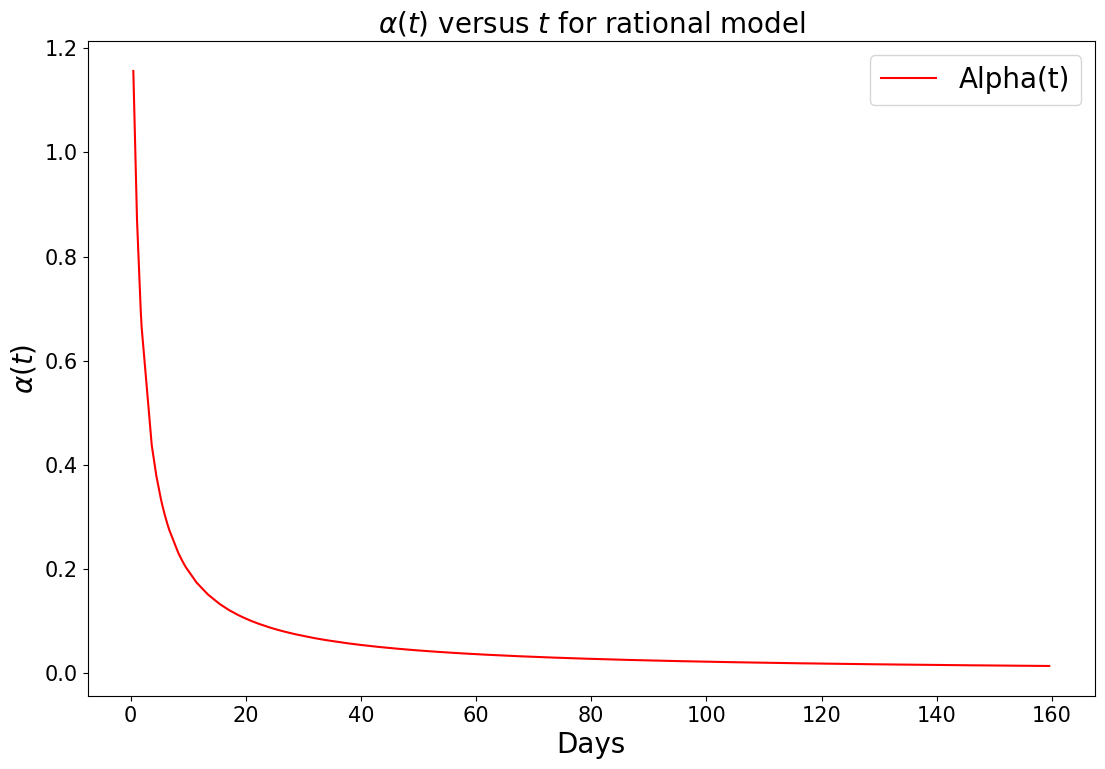

In [18]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for rational model',fontsize = 20)
ax1.plot(np.mean(T1R,0), np.mean(alphaR,0),'r')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [19]:
beta_valueR = np.mean(beta_valueR)
kappa_valueR = np.mean(kappa_valueR)
Nf_valueR = np.mean(Nf_valueR)
d_valueR  = np.mean(d_valueR )


mean_R_sqR = np.mean(R_sqR)
mean_MAPER = np.mean(MAPE_R)
mean_EVR = np.mean(EV_R)
mean_RMSER = np.mean(RMSE_R)

In [20]:
print(beta_valueR)
print(kappa_valueR)
print(d_valueR)
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueR)

7499.3847656240005
2.253512336
0.680979288
13375080.916508118


In [21]:
print(mean_R_sqR)
print(mean_MAPER)
print(mean_EVR)
print(mean_RMSER)

0.9685009202613651
0.3514899234919702
0.8831696275965882
2652080.5244836756


In [22]:
logistic_function_rational = lambda t, Nf, beta, kappa, d: \
    Nf / (1 + beta * (1 + d*t)**-kappa)

In [23]:
def plateau_rate(T0R, I0R, Nf_valueR, beta_valueR, kappa_valueR, d_valueR, function, future_days=300):
    # Calculate rates of infection based on model
    rates = []
    
    start_day = int(T0R[-1])  # Make sure to convert to integer
    for day in range(start_day, start_day + future_days):
        infection_today = function(
            day,
            Nf_valueR,
            beta_valueR,
            kappa_valueR,
            d_valueR,
        )
        infection_yesterday = function(
            day - 1,
            Nf_valueR,
            beta_valueR,
            kappa_valueR,
            d_valueR,
        )
        rate = infection_today - infection_yesterday
        rates.append(rate)
    
    # Find the maximum rate of infection
    max_rate = max(rates)
    
    # Identify the day when the rate of infection is 5% of the maximum rate
    for i, rate in enumerate(rates):
        if rate <= 0.05 * max_rate:
            plateau_day = start_day + i
            break
    
    return plateau_day, function(
            plateau_day,
            Nf_valueR,
            beta_valueR,
            kappa_valueR,
            d_valueR,
        )






In [24]:
dayys, confirmed_now = plateau_rate(T0R, I0R, Nf_valueR, beta_valueR, kappa_valueR, d_valueR, logistic_function_rational)
print(f"In {dayys} days the number of infected people will plateau at {int(np.min(I0R) + (np.max(I0R) - np.min(I0R))*confirmed_now)}")


In 442 days the number of infected people will plateau at 13121787


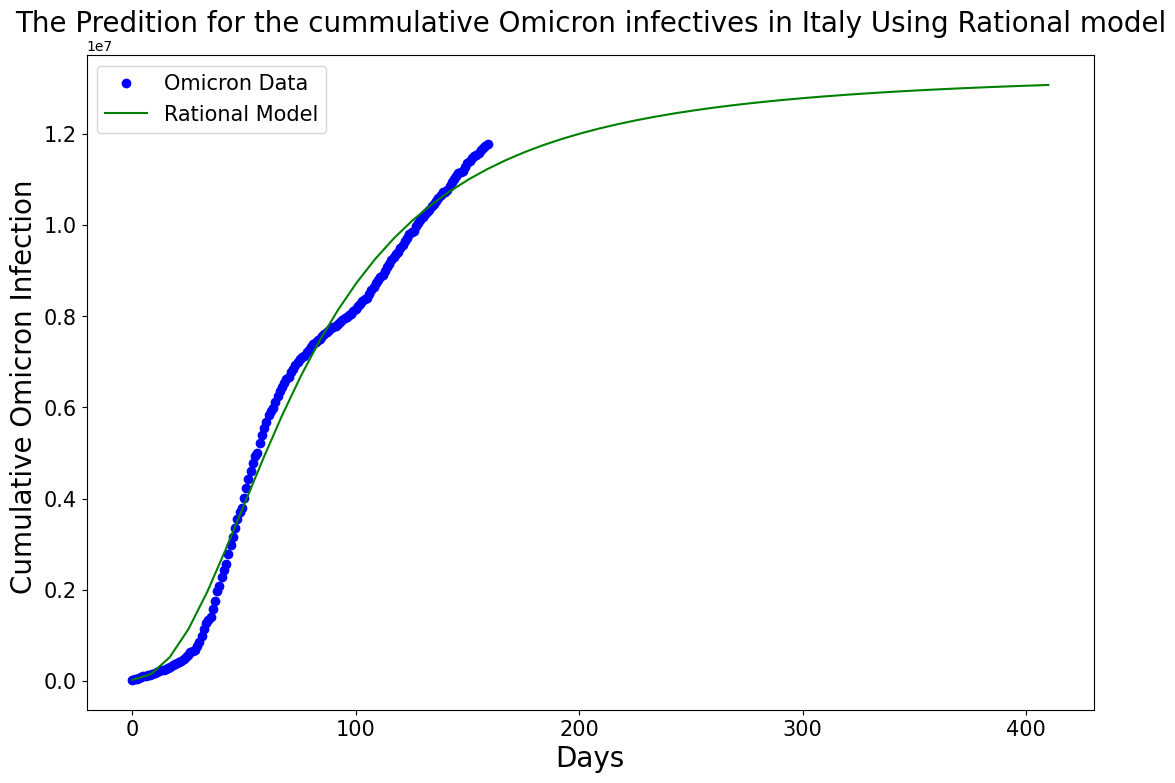

In [25]:
xR = np.linspace(0, len(I0R) + 250)
yR = np.min(I0R) + (np.max(I0R) - np.min(I0R))*logistic_function_rational(xR, Nf_valueR, beta_valueR, kappa_valueR,d_valueR)

from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('The Predition for the cummulative Omicron infectives in Italy Using Rational model',fontsize = 20)
ax1.plot(T0R,I0R,'bo')
ax1.plot(xR, yR,'g')
ax1.legend(('Omicron Data','Rational Model', 'Rational model prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection ', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

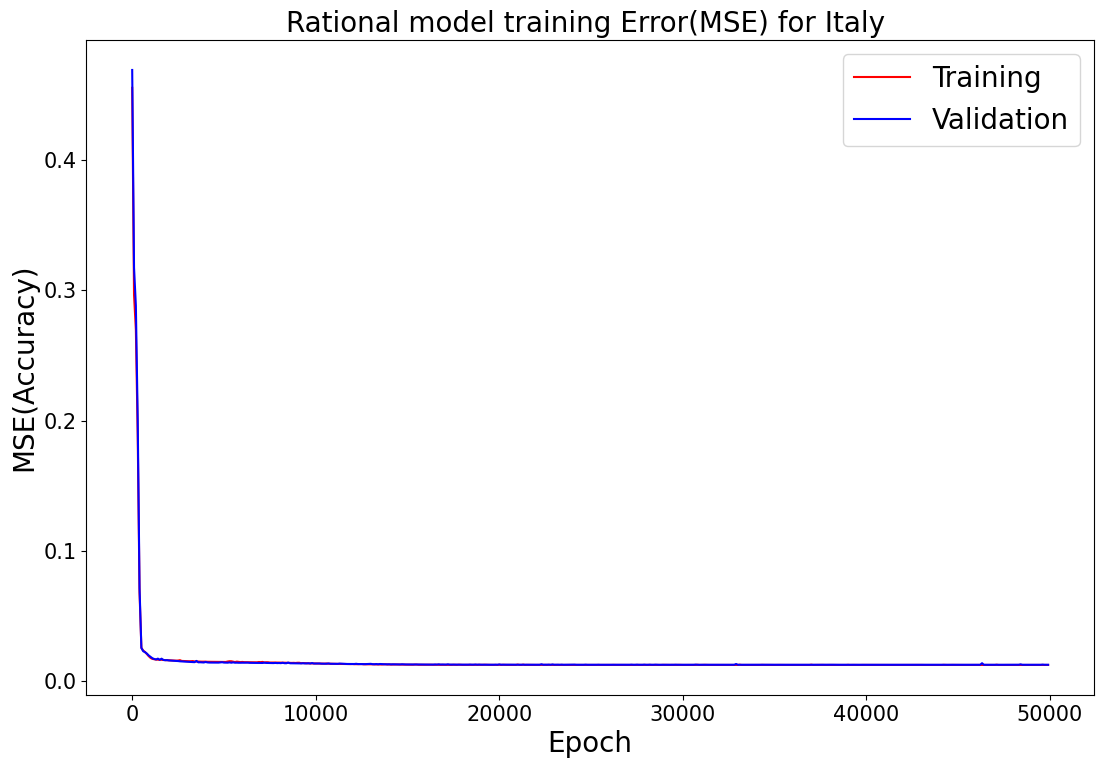

In [26]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Rational model training Error(MSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(mse_train_lossR,0),"r")
ax1.plot(np.arange(0,50000,100),np.mean(mse_validation_lossR,0),"b")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

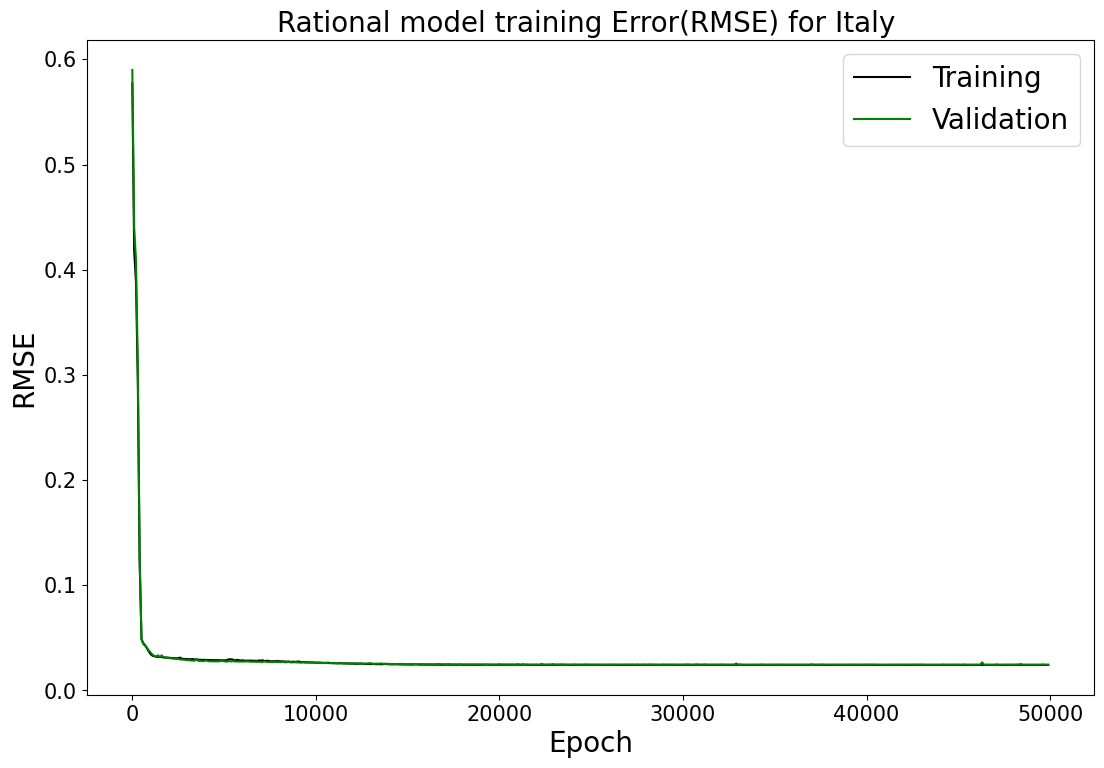

In [27]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Rational model training Error(RMSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(rmse_train_lossR,0),"k")
ax1.plot(np.arange(0,50000,100),np.mean(rmse_validation_lossR,0), "g")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### Birational

In [28]:
T1B = np.loadtxt("timeB.txt")
I1B = np.loadtxt("infectdB.txt")
 
T0B = np.loadtxt("daysB.txt")
I0B = np.loadtxt("casesB.txt")
alphaB = np.loadtxt("alphaB.txt")

beta_valueB = np.loadtxt("betaB.txt")
beta1_valueB = np.loadtxt("beta1B.txt")
kappa_valueB = np.loadtxt("kappaB.txt")
kappa1_valueB = np.loadtxt("kappa1B.txt")
c_valueB = np.loadtxt("cB.txt")
c1_valueB = np.loadtxt("c1B.txt")
d_valueB = np.loadtxt("dB.txt")
d1_valueB = np.loadtxt("d1B.txt")




R_sqB = np.loadtxt("R_sqB.txt")
MAPE_B = np.loadtxt("MAPE_B.txt")
EV_B = np.loadtxt("EV_B.txt")
RMSE_B = np.loadtxt("RMSE_B.txt")

mse_train_lossB = np.loadtxt("mse_train_lossB.txt")
mse_validation_lossB = np.loadtxt("mse_validation_lossB.txt")
rmse_train_lossB = np.loadtxt("rmse_train_lossB.txt")
rmse_validation_lossB = np.loadtxt("rmse_validation_lossB.txt")

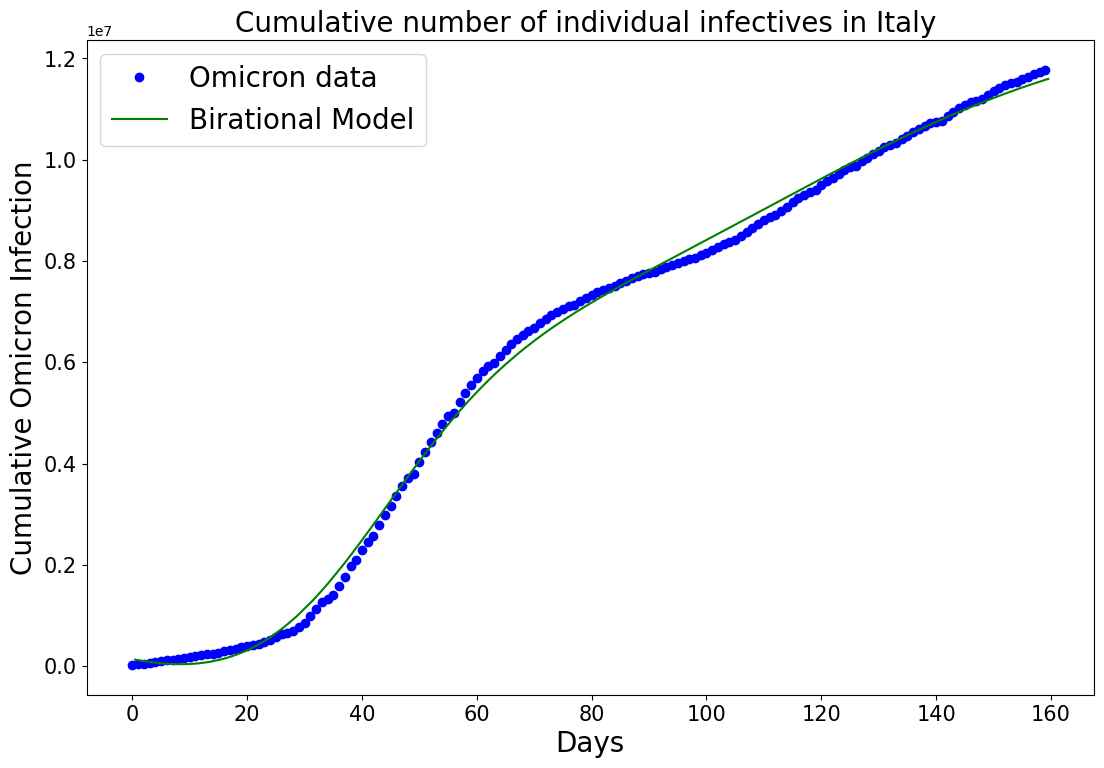

In [29]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0B,I0B,'bo')
ax1.plot(T1B[0,:],np.mean(I1B,0),'g')
ax1.fill_between(T1B[0,:],                 
 np.mean(I1B,0)-(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 np.mean(I1B,0)+(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Birational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)


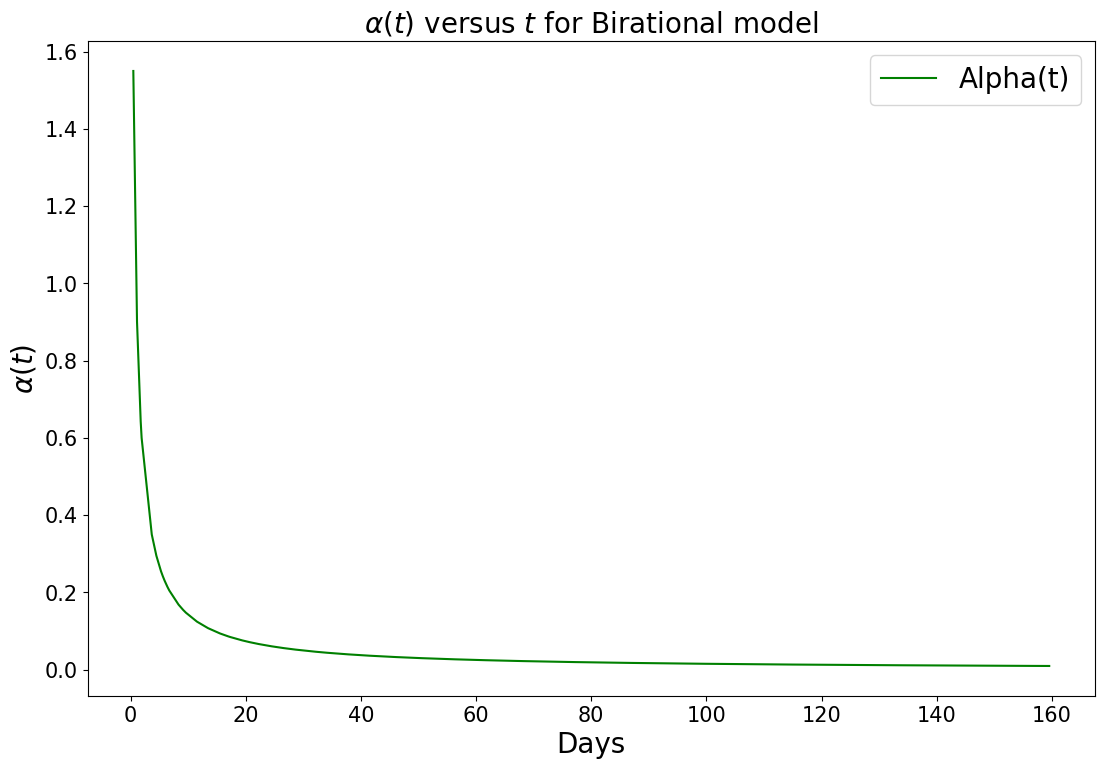

In [30]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for Birational model',fontsize = 20)
ax1.plot(np.mean(T1B,0), np.mean(alphaB,0),'g')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [31]:
beta_valueB = np.mean(beta_valueB)
beta1_valueB = np.mean(beta1_valueB)
kappa_valueB = np.mean(kappa_valueB)
kappa1_valueB = np.mean(kappa1_valueB)
c_valueB = np.mean(c_valueB)
c1_valueB = np.mean(c1_valueB)
d_valueB  = np.mean(d_valueB )
d1_valueB  = np.mean(d1_valueB )



mean_R_sqB = np.mean(R_sqB)
mean_MAPEB = np.mean(MAPE_B)
mean_EVB = np.mean(EV_B)
mean_RMSEB = np.mean(RMSE_B)


In [32]:
print(beta_valueB)
print(beta1_valueB)
print(kappa_valueB)
print(kappa1_valueB)
print(d_valueB)
print(d1_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c1_valueB)

1998.6043701160002
996.7388671880001
14.838840866000002
1.529090666
4.856977939999999
1.12854912
73618.607273694
18112257.83280473


In [33]:
print(mean_R_sqB)
print(mean_MAPEB)
print(mean_EVB)
print(mean_RMSEB)

0.9736699457405338
0.48512597036390986
0.8940228551103516
2651400.174947541


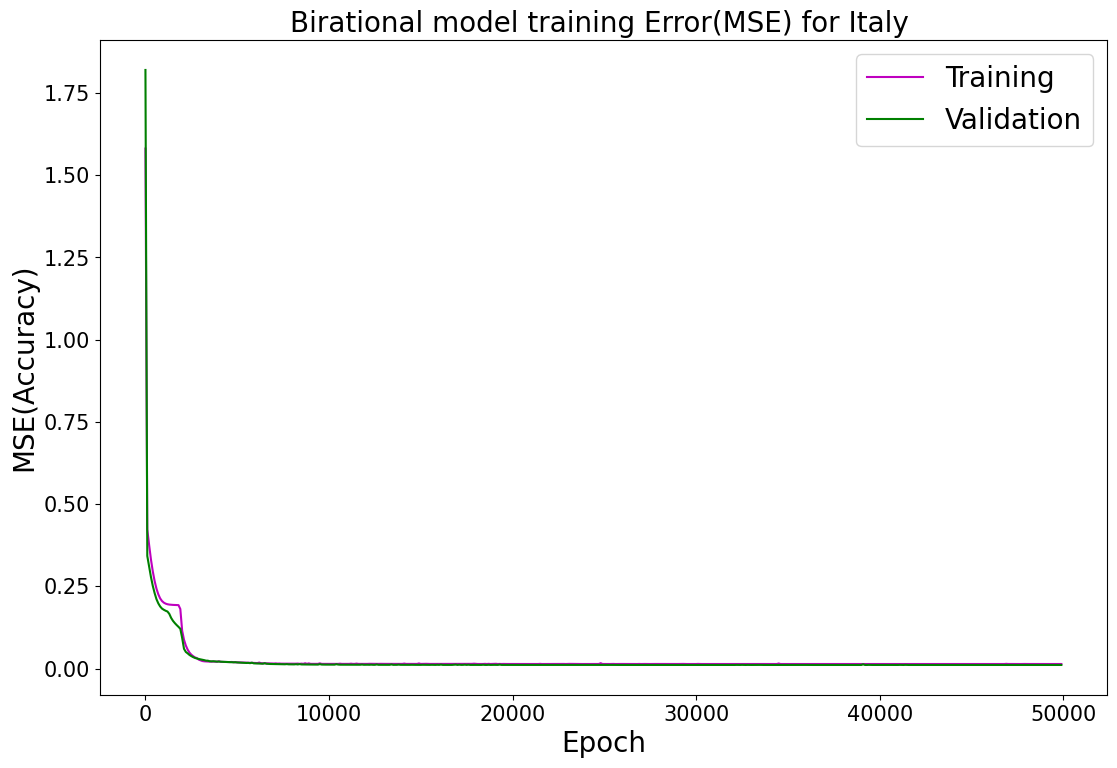

In [34]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Birational model training Error(MSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(mse_train_lossB,0),"m")
ax1.plot(np.arange(0,50000,100),np.mean(mse_validation_lossB,0),"g")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

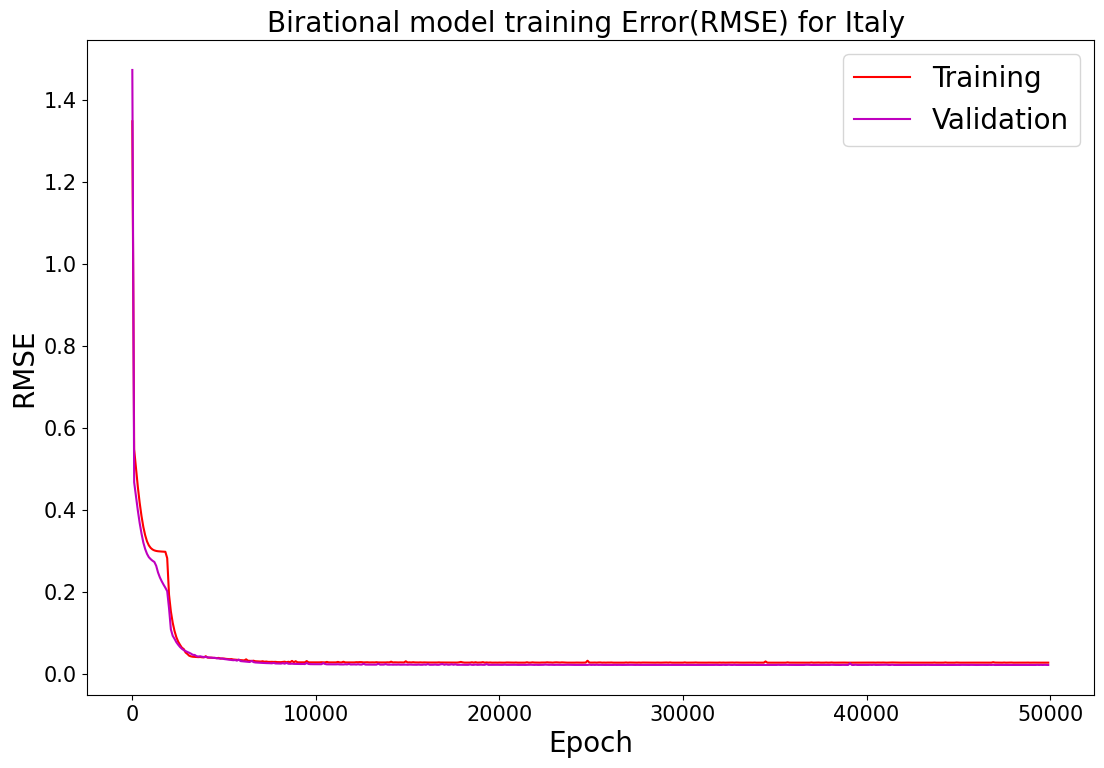

In [35]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Birational model training Error(RMSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(rmse_train_lossB,0),"r")
ax1.plot(np.arange(0,50000,100),np.mean(rmse_validation_lossB,0), "m")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [36]:
def logistic_function_BirationalP(t, c, beta, kappa, d, c1, beta1, kappa1, d1):
    X = 20
    return (((c/(1+beta*(1 + d*X)**-kappa)) - (c1/(1+beta1*(1 + d1*X)**-kappa1))+ (c1/(1+beta1*(1 + d1*t)**-kappa1))))

In [37]:
def plateau_rate(T0B, I0B, c_valueB, beta_valueB, kappa_valueB, d_valueB, c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB, function, future_days=500):
    # Calculate rates of infection based on model
    rates = []
    
    start_day = int(T0B[-1])  # Make sure to convert to integer
    for day in range(start_day, start_day + future_days):
        infection_today = function(
            day,
            c_valueB,
            beta_valueB,
            kappa_valueB,
            d_valueB,
            c1_valueB,
            beta1_valueB,
            kappa1_valueB,
            d1_valueB
        )
        infection_yesterday = function(
            day - 1,
            c_valueB,
            beta_valueB,
            kappa_valueB,
            d_valueB,
            c1_valueB,
            beta1_valueB,
            kappa1_valueB,
            d1_valueB
        )
        rate = infection_today - infection_yesterday
        rates.append(rate)
    
    # Find the maximum rate of infection
    max_rate = max(rates)
    
    # Identify the day when the rate of infection is 5% of the maximum rate
    for i, rate in enumerate(rates):
        if rate <= 0.05 * max_rate:
            plateau_day = start_day + i
            break
    
    return plateau_day, function(
            plateau_day,
            c_valueB,
            beta_valueB,
            kappa_valueB,
            d_valueB,
            c1_valueB,
            beta1_valueB,
            kappa1_valueB,
            d1_valueB
        )






In [38]:
dayys, confirmed_now = plateau_rate(T0B, I0B, c_valueB, beta_valueB, kappa_valueB, d_valueB, c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB, logistic_function_BirationalP)
print(f"In {dayys} days the number of infected people will plateau at {int(np.min(I0B) + (np.max(I0B) - np.min(I0B))*confirmed_now)}")


In 641 days the number of infected people will plateau at 15409748


In [39]:
def logistic_function_Birational(t, c, beta, kappa, d, c1, beta1, kappa1, d1):
    X = 20
    midpoint = len(np.argwhere(t <= X))
    t1 = t[:midpoint] # first half
    t2 = t[midpoint:]
    result1 = (c/(1+beta*(1 + d*t1)**-kappa))
    result2 = (((c/(1+beta*(1 + d*X)**-kappa)) - (c1/(1+beta1*(1 + d1*X)**-kappa1))+ (c1/(1+beta1*(1 + d1*t2)**-kappa1))))
    return np.concatenate((result1, result2))

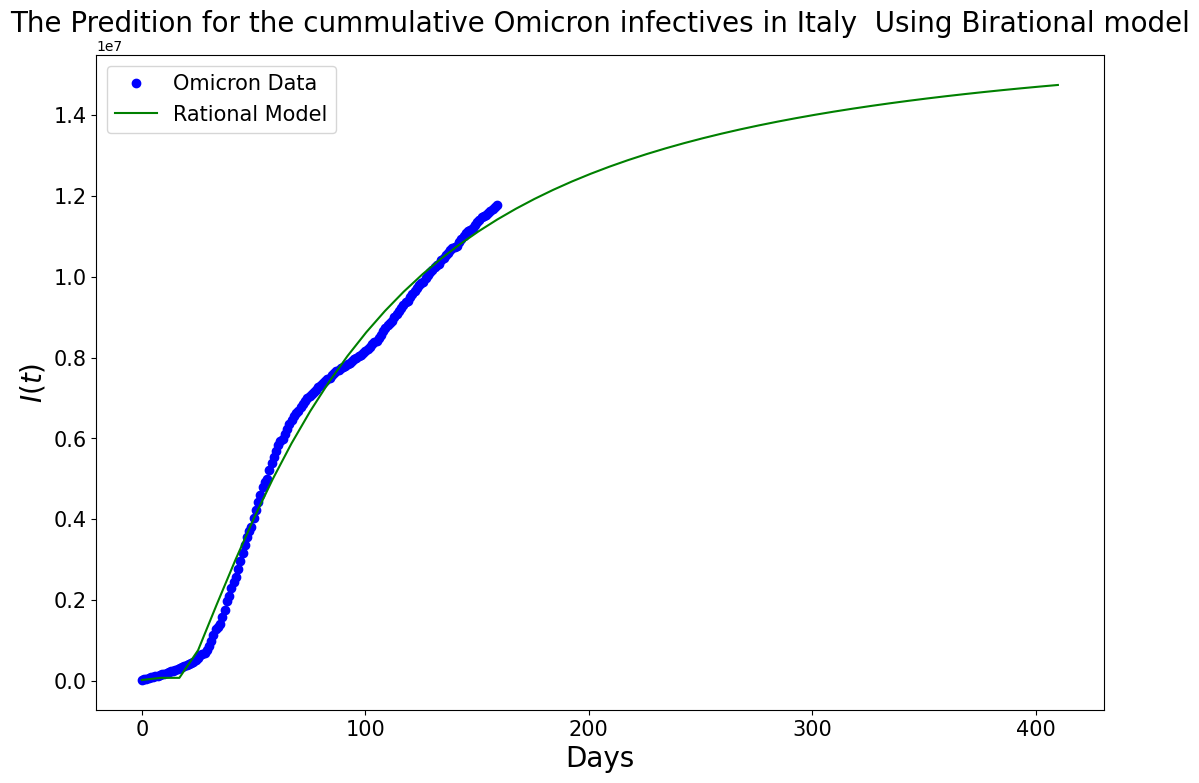

In [40]:
xB = np.linspace(0, len(I0B) + 250)
yB = np.min(I0B) + (np.max(I0B) - np.min(I0B))*logistic_function_Birational(xB, c_valueB, beta_valueB, kappa_valueB,d_valueB,c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB)


from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))

ax1.set_title('The Predition for the cummulative Omicron infectives in Italy  Using Birational model',fontsize = 20)
ax1.plot(T0B,I0B,'bo')
ax1.plot(xB, yB,'g')
ax1.legend(('Omicron Data','Rational Model', 'Birational model prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$I(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### TIME SERIES

In [41]:
T1A = np.loadtxt("timeA.txt")
I1A = np.loadtxt("infectdA.txt")
 
T0A = np.loadtxt("daysA.txt")
I0A = np.loadtxt("casesA.txt")
alphaA = np.loadtxt("alphaA.txt")

Nf_A = np.loadtxt("Nf_A.txt")


R_sqA = np.loadtxt("R_sqA.txt")
MAPE_A = np.loadtxt("MAPE_A.txt")
EV_A = np.loadtxt("EV_A.txt")
RMSE_A = np.loadtxt("RMSE_A.txt")

mse_train_lossA = np.loadtxt("mse_train_lossA.txt")
mse_validation_lossA = np.loadtxt("mse_validation_lossA.txt")
rmse_train_lossA = np.loadtxt("rmse_train_lossA.txt")
rmse_validation_lossA = np.loadtxt("rmse_validation_lossA.txt")

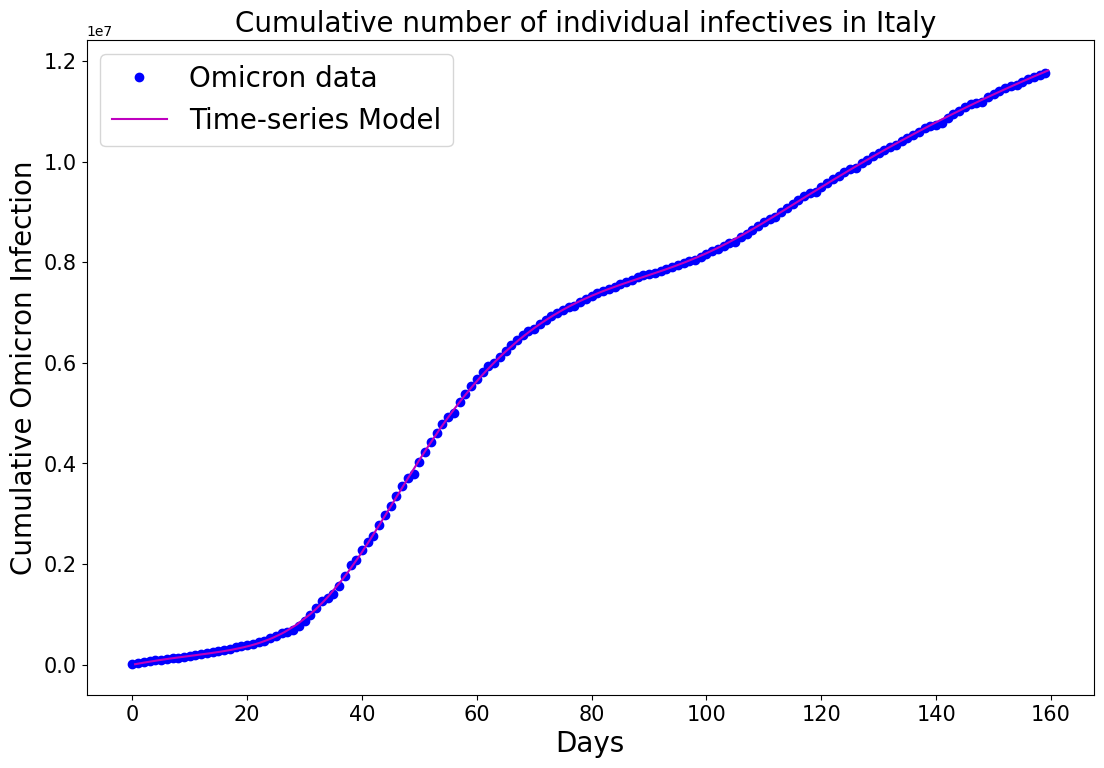

In [42]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title('Cumulative number of individual infectives in Italy ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'m')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
ax1.legend(('Omicron data','Time-series Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

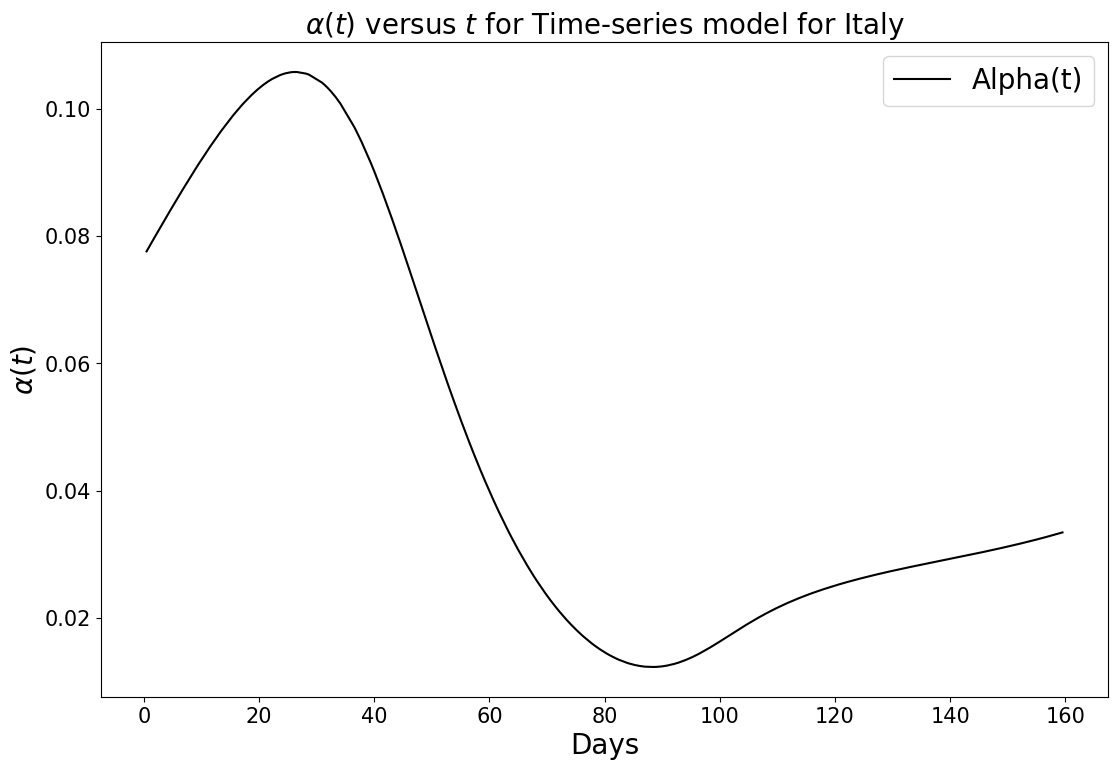

In [43]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for Time-series model for Italy',fontsize = 20)
ax1.plot(np.mean(T1A,0), np.mean(alphaA,0),'k')
ax1.legend(('Alpha(t)', 'Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [44]:
# mean and std of the parameters
 
Nf_valueA = np.mean(Nf_A)




mean_R_sqA = np.mean(R_sqA)
mean_MAPEA = np.mean(MAPE_A)
mean_EVA = np.mean(EV_A)
mean_RMSEA = np.mean(RMSE_A)

In [45]:
print(mean_R_sqA)
print(mean_MAPEA)
print(mean_EVA)
print(mean_RMSEA)
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueA)

0.958058468631702
0.3933390720237971
0.8957781094102817
2604505.3596405224
13338639.521478944


In [46]:
from scipy.integrate import odeint

In [47]:
def function(I, t, alpha, Nf):
    dIdt = alpha*I*(1 - (I/Nf))
    return dIdt

In [48]:
alpha = np.mean(alphaA,0)[-1]
Nf = Nf_valueA
I_p = np.mean(I1A,0)[-1]/(np.min(results7) + (np.max(results7) - np.min(results7)))

In [49]:
tt = np.linspace(160,410)
I_PP = np.min(I0A) + (np.max(I0A) - np.min(I0A))*odeint(function, I_p, tt, args=(alpha, Nf))
tt1 =np.linspace(0,160)

In [50]:
tt = np.linspace(160,410)
I_PP_values = np.min(I0A) + (np.max(I0A) - np.min(I0A)) * odeint(function, I_p, tt, args=(alpha, Nf)).squeeze()
tt1 = np.linspace(0,160)


# Calculate the gradient (rate of change)
rates = np.gradient(I_PP_values, tt)

# Find the maximum rate of change
max_rate = np.max(rates)

# Identify the day when the rate of infection is 5% of the maximum rate for 10 consecutive days
consecutive_days_below_threshold = 0
plateau_day = None

for i, t in enumerate(tt):
    if rates[i] <= 0.05 * max_rate:
        consecutive_days_below_threshold += 1
    else:
        consecutive_days_below_threshold = 0
        
    if consecutive_days_below_threshold == 30:  # 15 consecutive days
        plateau_day = t - 29  # Go back 14 days to find the first day of the 15-day period
        break

if plateau_day:
    # Find the index of the closest value to plateau_day in tt
    closest_index = np.argmin(np.abs(tt - plateau_day))
    plateau_value = I_PP_values[closest_index]
    print(f"On day {int(plateau_day)} the number of infected people will plateau at {int(plateau_value)}")
else:
    print("Couldn't find a day where the infections plateau based on the criteria.")


On day 381 the number of infected people will plateau at 13337516


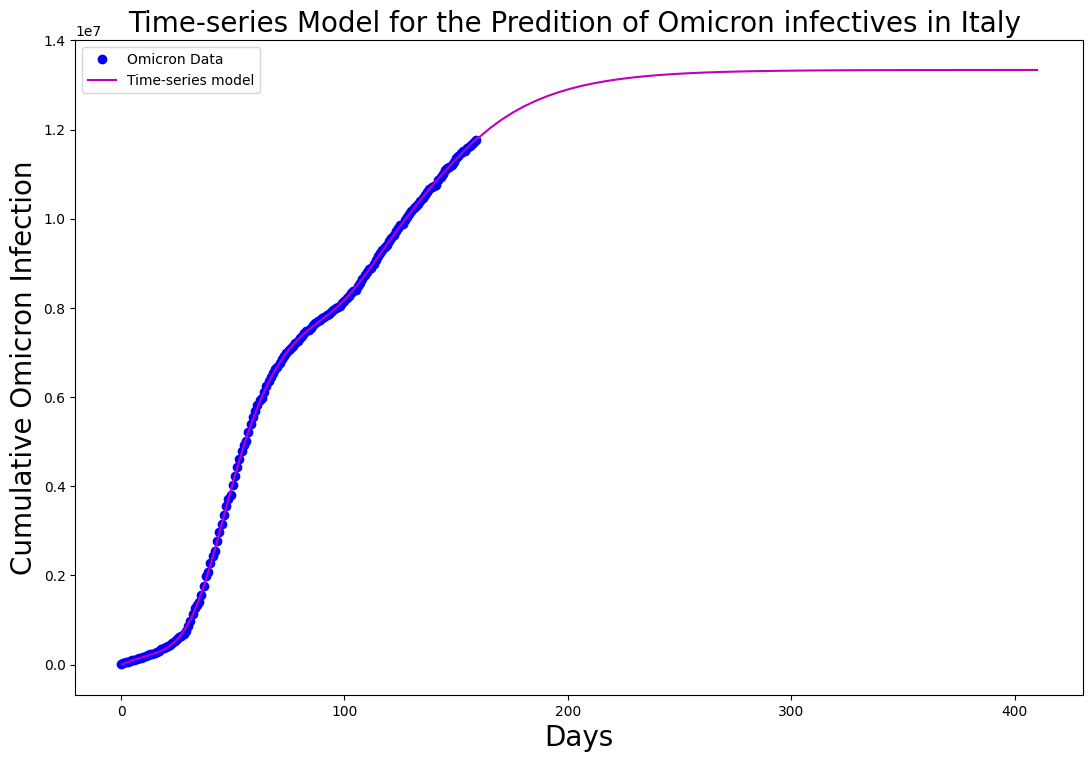

In [51]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Time-series Model for the Predition of Omicron infectives in Italy ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'m')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.plot(tt, I_PP,'m')
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
ax1.legend(('Omicron Data','Time-series model'),loc='best',fontsize = 10)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=10)

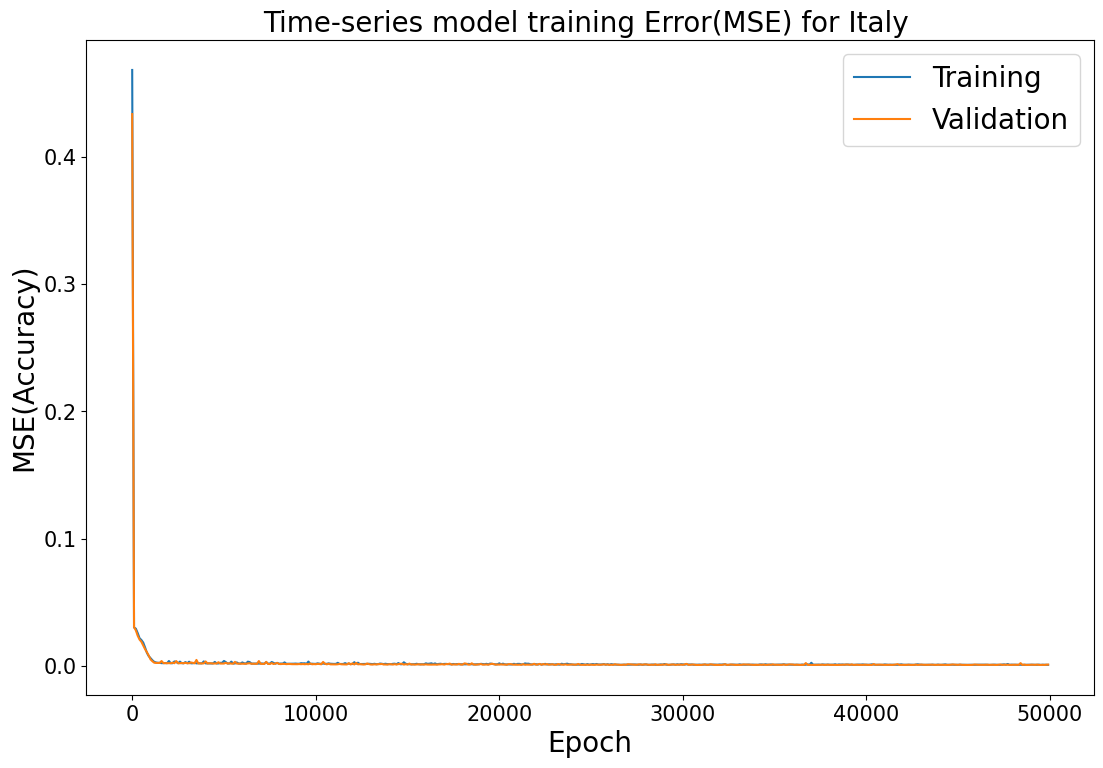

In [52]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Time-series model training Error(MSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(mse_train_lossA,0))
ax1.plot(np.arange(0,50000,100),np.mean(mse_validation_lossA,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

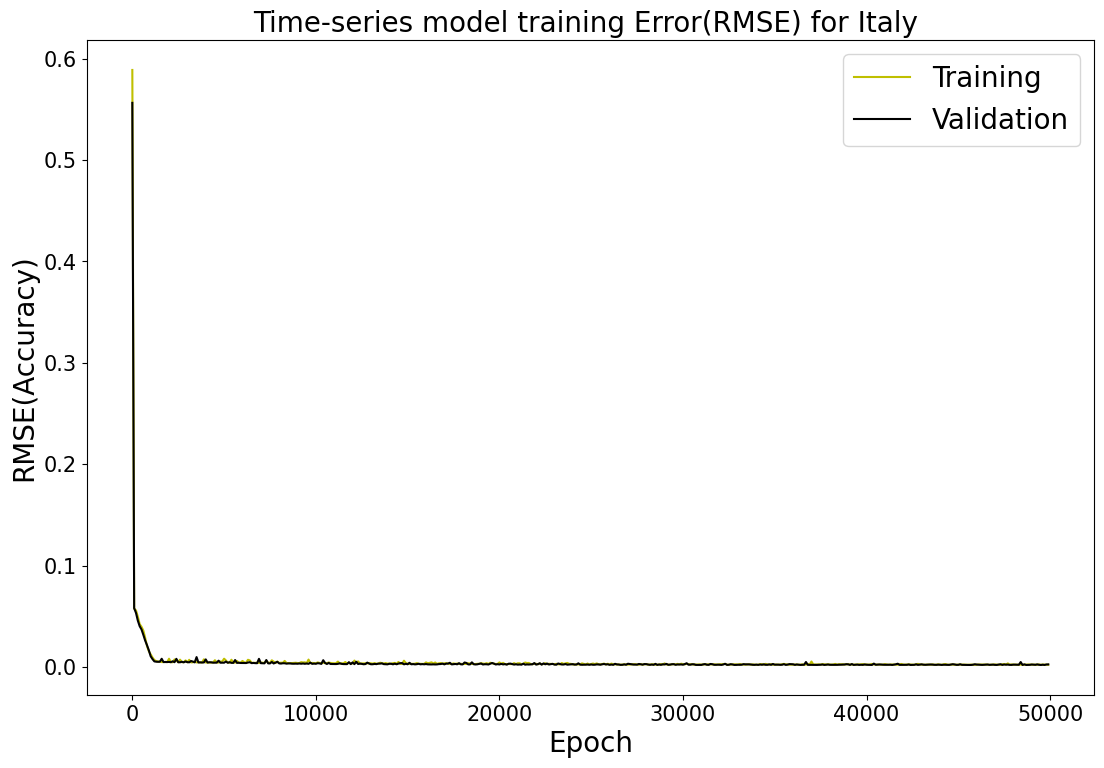

In [53]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Time-series model training Error(RMSE) for Italy ',fontsize = 20)
ax1.plot(np.arange(0,50000,100), np.mean(rmse_train_lossA,0), "y")
ax1.plot(np.arange(0,50000,100),np.mean(rmse_validation_lossA,0),"k")
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

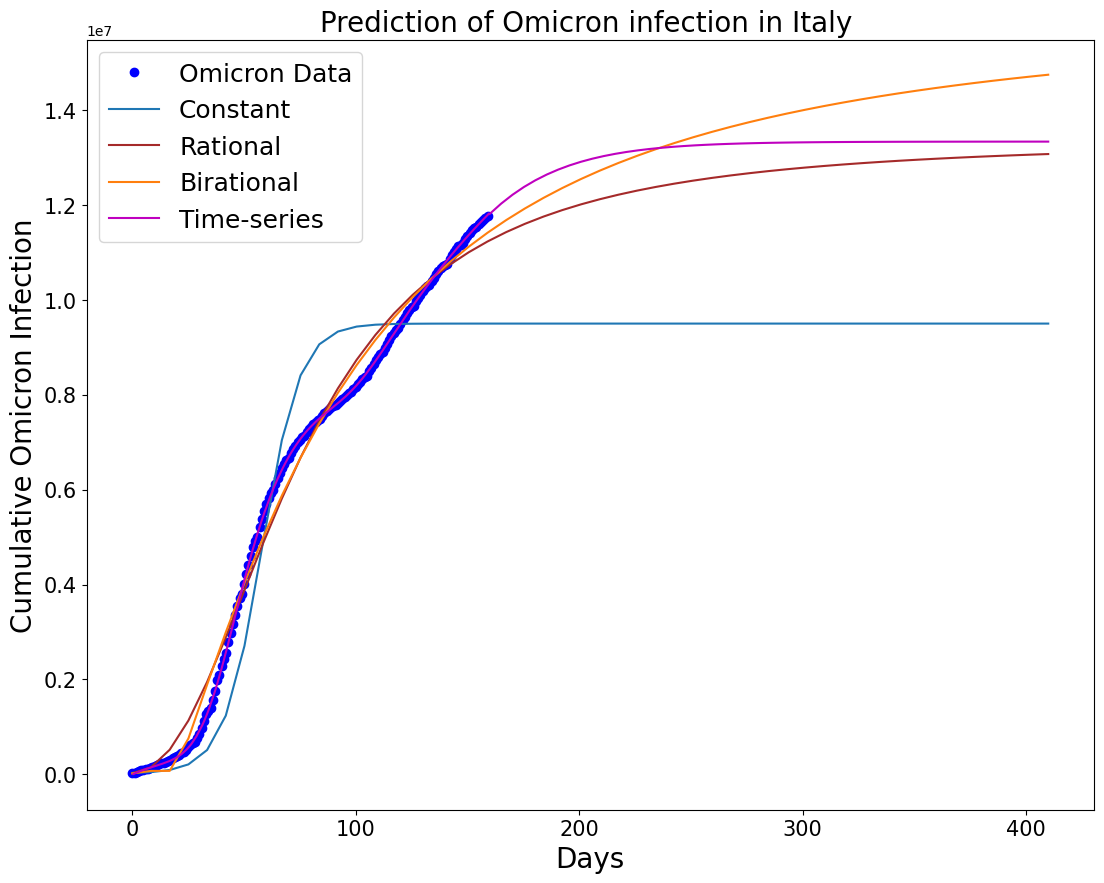

In [54]:

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Prediction of Omicron infection in Italy ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')


ax1.plot(xL, yL)
ax1.plot(xR, yR,'brown')
ax1.plot(xB, yB)
ax1.plot(T1A[0,:],np.mean(I1A,0),'m')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.plot(tt, I_PP,"m")
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('Cumulative Omicron Infection', fontsize = 20)
fig.set_size_inches(w=13,h=10)
ax1.legend(('Omicron Data', 'Constant','Rational','Birational','Time-series',),loc='best',fontsize = 18)
ax1.tick_params(labelsize=15)